# Exam 2 (100 Points)

**Question 1 - Multiple Regression (40 Points)**
- We will use dataset "fish" from the wooldridge package to estimate people's demand for fish
- This dataset contains information of fish sale price and quantity of a local fish market
- The variables are as below:
    - **lavgprc**: log of average price
    - **ltotqty**: log of total quantity sold
    - **mon** = 1 if Monday
    - **tues** = 1 if Tuesdays
    - **wed** = 1 if Wednesday
    - **thurs** = 1 if Thursday
- Assume that the demand equation can be written as: $$log(totqty) = \beta_0 + \beta_1log(avgprc) + \beta_2mon + \beta_3tues + \beta_4wed + \beta_5thurs + \mu$$

In [6]:
import wooldridge as woo
df = woo.data("fish")
df.head()

,prca,prcw,qtya,qtyw,mon,tues,wed,thurs,speed2,wave2,speed3,wave3,avgprc,totqty,lavgprc,ltotqty,t,lavgp_1,gavgprc,gavgp_1
0,0.622222,0.766667,1875,2205,1,0,0,0,15,7.5,20,9.0,0.700286,4080,-0.356266,8.313852,1,NaN,NaN,NaN
1,0.972222,1.175000,2900,566,0,0,1,0,10,5.0,20,7.5,1.005336,3466,0.005322,8.150757,2,-0.356266,0.361588,NaN
2,1.233333,1.475000,770,1525,0,0,0,1,10,6.0,20,4.0,1.393918,2295,0.332118,7.738488,3,0.005322,0.326797,0.361588
3,1.928571,1.625000,927,943,0,0,0,0,15,6.0,20,5.0,1.775487,1870,0.574075,7.533694,4,0.332118,0.241956,0.326797
4,0.803125,0.864286,4220,2665,1,0,0,0,10,3.5,20,3.5,0.826799,6885,-0.190194,8.837100,5,0.574075,-0.764269,0.241956


**1-1(5 points)**: Use OLS to obtain the estimates of $\beta_s$, print the regression table 

In [7]:
import statsmodels.formula.api as smf
reg = smf.ols("ltotqty ~ lavgprc + mon + tues + wed + thurs", data = df)
res = reg.fit()
print(res.params)
print(res.summary())

Intercept    8.244317
lavgprc     -0.524655
mon         -0.310927
tues        -0.682790
wed         -0.533894
thurs        0.067227
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                ltotqty   R-squared:                       0.217
Model:                            OLS   Adj. R-squared:                  0.174
Method:                 Least Squares   F-statistic:                     5.039
Date:                Thu, 16 Nov 2023   Prob (F-statistic):           0.000403
Time:                        14:20:58   Log-Likelihood:                -99.253
No. Observations:                  97   AIC:                             210.5
Df Residuals:                      91   BIC:                             226.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.

**1-2 (10 points)**: Clearly interpret the coefficient on log(avgprc)

with one more unit of increase in average price, the respondents total quantity sold is going to decrease -.5247 units. 


**1-3 (10 points)**: Is log(avgprc) a significant determinant of log(totqtr) and why?

It is statiscally singnifcant since it is less than .05 there for it is confident

**1-4 (5 points)**: Draw the regression plot for log(totqty) on log(avgprc)

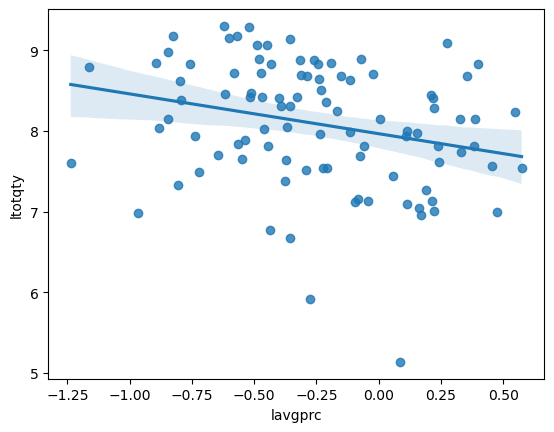

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.regplot(x = "lavgprc", y = "ltotqty", data = df)
plt.show()

**1-5 (10 points)**: Conduct an f-test on the hypothesis "mon = 0, tues = 0, wed = 0, thurs = 0". What conclusion can you draw?

In [9]:
hypothesis = "(mon = 0), (tues = 0),(wed = 0), (thurs = 0)"
print(res.f_test(hypothesis))

<F test: F=4.319832990137934, p=0.003031024357433197, df_denom=91, df_num=4>


BC p value is smaller than .05 we will reject the null hypothesis. hypothesis is monday plays no role in total quantity sold, and tues, wed, thurs does not play a role in total quantity sold

**Question 2 - Omitted Variable Bias (25 points)**

**2-1 (5 points)**: Import the data.csv file and print the first five rows of the dataset
- Variables in the dataset are set as follows:
    - x1 and x2 follow a multivariate normal distribution
    - x3 follows a uniform distribution
    - u follows a standard normal distribution
    - y is generated as: $$ y = 1 + 1.5*x_1 + 2*x_2 + 3.5*x_3 + \mu$$

In [40]:
import pandas as pd
df = pd.read_csv("data.csv")
df.head()

,x1,x2,x3,u,y
0,2.057697,7.030958,0.365311,-1.008496,21.934030
1,0.123248,5.147403,0.723239,0.368550,16.953266
2,1.166863,6.758002,1.203740,0.111503,23.969895
3,2.824675,6.940899,1.420139,1.510180,29.069927
4,-0.305167,3.245195,0.695617,-2.297547,8.792348


In [58]:
import numpy as np
import pandas as pd
np.random.seed(1)
x3 = np.random.uniform(1, 10, 1000)
x12 = np.random.multivariate_normal([0, 5], [[4, 5], [5, 9]], 1000)
u = np.random.randn(1000)
df = pd.DataFrame({"x1": x12[:, 0], "x2": x12[:, 1], "x3": x3, "u": u})
df.head()
df["y"] = 1 + 1.5*df["x1"] + 2*df["x2"] + 3.5*df["x3"] + df["u"]
df.head()

,x1,x2,x3,u,y
0,-1.063260,2.691395,4.753198,0.296370,21.720462
1,-2.121900,2.982724,7.482920,0.000008,29.972827
2,2.801666,9.252892,1.001029,-0.034211,27.177675
3,0.361978,5.154109,3.720993,-0.281499,24.593161
4,-0.120881,8.163531,2.320803,0.580178,25.848728


In [57]:
import statsmodels.formula.api as smf 
reg = smf.ols("y~x1+x2+x3", data = df) 
res = reg.fit()
print(res.params)
print(res.bse)
print(res.tvalues)

Intercept    0.948779
x1           1.521681
x2           1.994631
x3           3.511834
dtype: float64
Intercept    0.120218
x1           0.028554
x2           0.018871
x3           0.011984
dtype: float64
Intercept      7.892184
x1            53.290941
x2           105.695655
x3           293.035422
dtype: float64


In [ ]:
import numpy as np
df = woo.data("data")
df = df.dropna(subset = ["x1"])

**2-2 (5 points)**: Estimate $ y = \beta_0 + \beta_1*x_1 + \beta_2*x_2$ and $ y = \beta_0 + \beta_1*x_1 + \beta_3*x_3$

In [ ]:
reg_ovb = smf.ols("y~x1+x2", data = df)
res_ovb = reg_ovb.fit()
print(res_ovb.params)
print(res_ovb.bse)
print(res_ovb.tvalues)

In [ ]:
reg_ovb = smf.ols("y~x1+x3", data = df)
res_ovb = reg_ovb.fit()
print(res_ovb.params)
print(res_ovb.bse)
print(res_ovb.tvalues)

In [43]:
import numpy as np
cov_yz = np.cov(df["x1"], df["x2"])[0, 1] 
cov_xz = np.cov(df["x1"], df["x2"])[0, 1] 
beta_iv = cov_yz / cov_xz
print(beta_iv)
print(res.params)

1.0
Intercept    8.244317
lavgprc     -0.524655
mon         -0.310927
tues        -0.682790
wed         -0.533894
thurs        0.067227
dtype: float64


In [44]:
import numpy as np
cov_yz = np.cov(df["x1"], df["x3"])[0, 1] 
cov_xz = np.cov(df["x1"], df["x3"])[0, 1] 
beta_iv = cov_yz / cov_xz
print(beta_iv)
print(res.params)

1.0
Intercept    8.244317
lavgprc     -0.524655
mon         -0.310927
tues        -0.682790
wed         -0.533894
thurs        0.067227
dtype: float64


**2-3 (15 points)**: Print the estimated coefficients from both regressions. Discuss which regression is supposed to have omitted variable bias and which is not and why? Are your estimates consistent with your assumption?

In [12]:
reg_ovb = smf.ols("y~x2+x3", data = df)
res_ovb = reg_ovb.fit()
print(res_ovb.params)
print(res_ovb.bse)
print(res_ovb.tvalues)

Intercept   -4.649839
x2           4.119959
x3           4.004466
dtype: float64
Intercept    0.222300
x2           0.024977
x3           0.029420
dtype: float64
Intercept    -20.916933
x2           164.951253
x3           136.112789
dtype: float64


omitted vairable has to be correlated with the variable of inteserst. the omitted vairable must impact y. omitting x2 will create bias on x1. 

Explain why its over estimating. If the product of those to determintents are negative it will cause underestimation. Opposite is true

Omitted variable is x2 than determinance is x2 adn x1. b2 x2 - y. if this is posititve it will show overestimation.

If two vairables are genereated from two separate distribution then they are not correlated if they follow multivaraite normal distribution then they are correlated.

we see that we omitted x3 which is not correlated bc of the original equation above. the U thing. therefore when x3 is omitted there is little to no bias because x3 does not correlate.

see that x1 is ommitted and it is a positive. it is also overestimated becasue B is also positive.

**Question 3 - Regularization (35 points)**
- We will use "wage2" dataset from wooldridge package to estimate determinants of montyly earnings
- The dataset contain variables as:
    - wage: monthly earnings
    - hours: average weekly hours
    - IQ: IQ score
    - KWW: knowledge of world work score
    - educ: years of work experience
    - age: age in years
    - meduc: mother's education
    - feduc: father's education

In [48]:
import wooldridge as woo
df = woo.data("wage2")
df.head()

,wage,hours,IQ,KWW,educ,exper,tenure,age,married,black,south,urban,sibs,brthord,meduc,feduc,lwage
0,769,40,93,35,12,11,2,31,1,0,0,1,1,2.0,8.0,8.0,6.645091
1,808,50,119,41,18,11,16,37,1,0,0,1,1,NaN,14.0,14.0,6.694562
2,825,40,108,46,14,11,9,33,1,0,0,1,1,2.0,14.0,14.0,6.715384
3,650,40,96,32,12,13,7,32,1,0,0,1,4,3.0,12.0,12.0,6.476973
4,562,40,74,27,11,14,5,34,1,0,0,1,10,6.0,6.0,11.0,6.331502


**3-1 (5 points)**: Use wage as dependent variable, and all the variables mentioned above as independent variables to estimate a ridge regression with tuninig parameter $\alpha = 10$

In [49]:
X = df[["hours", "IQ", "KWW", "educ", "age", "meduc", "feduc"]]
y= df["wage"]

In [50]:
import sklearn.linear_model as slm
reg = slm.Ridge(alpha = 10, fit_intercept = False)
reg.fit(X, y)
print(reg.coef_)

ValueError: Input X contains NaN.
Ridge does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

**3-2 (10 points)**: Explain the idea of k-fold cross-validation

explain why u need to use cross validation. the idea of cross validation u will split your sample into 5 sub samples and have 5 iterations using 4 as a triaing sample and one as an evaluatino sample.

**3-3 (10 points)**: Use 10-fold cross-validation with default scoring to find out the best $\alpha$ between 1 and 200 (stepsize = 0.5)

In [51]:
import numpy as np
import sklearn.model_selection as sm
df = woo.data("wage2")
X = df[["hours", "IQ"]]
y= df["wage"]
reg = sm.GridSearchCV(estimator = slm.Ridge(),
                     param_grid = {"alpha": np.arange(1000, 2000, 0.1)},
                     cv = 10, scoring = "r2",
                     verbose = 1)
reg.fit(X, y)

Fitting 10 folds for each of 10000 candidates, totalling 100000 fits


GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': array([1000. , 1000.1, 1000.2, ..., 1999.7, 1999.8, 1999.9])},
             scoring='r2', verbose=1)

In [52]:
print(reg.best_params_)

{'alpha': 1999.9000000002275}


**3-4 (10 points)**: According to your results from last question, find out an even better $\alpha$ and explain how to continue to figure out the **best** $\alpha$

if u want to shirnk params lowers it 1000, 2000, .1 to find a more accuarate/best alpha